**IMPORT THE NECESSARY LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**READ IN THE DATASET**

In [3]:
df = pd.read_csv('cement_slump.csv')

In [4]:
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


**PERFORM EXPLORATORY DATA ANALYSIS**

In [5]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<Axes: >

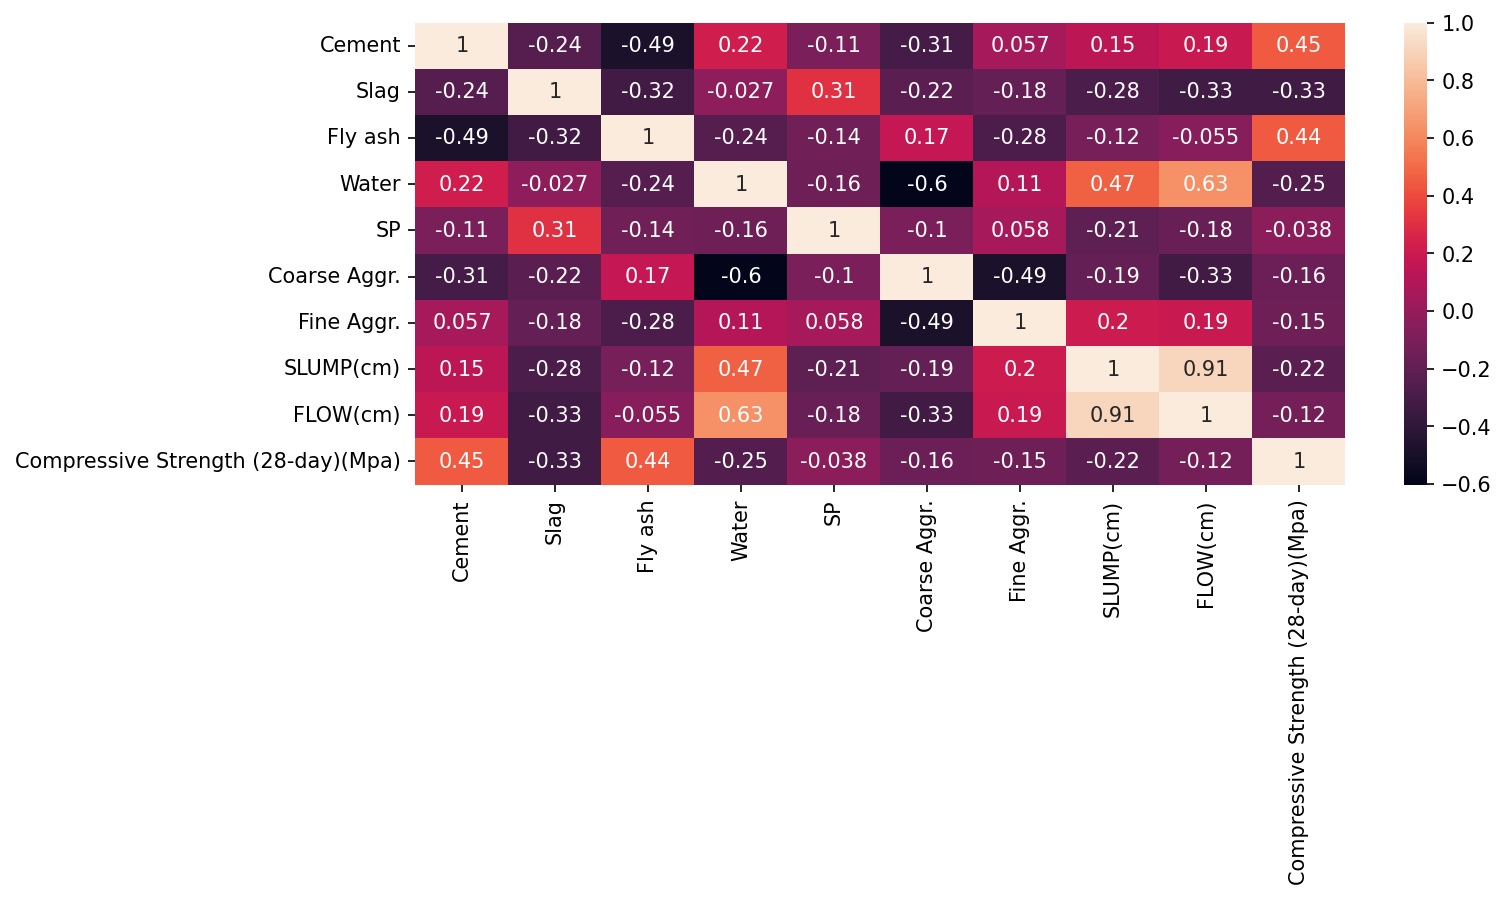

In [6]:
plt.figure(figsize=(10,4), dpi=150)
sns.heatmap(df.corr(), annot=True)

**SEPERATE FEATURES AND LABEL**

In [7]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)

In [8]:
y = df['Compressive Strength (28-day)(Mpa)']

**PERFORM TRAIN TEST SPLIT**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

**CREATE AN INSTANCE OF A SCALER**

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

**SCALE THE TRAIN AND TEST FEATURE DATASET**

In [11]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**CREATE THE MODEL FOR THE SVM**

In [13]:
from sklearn.svm import SVR

model = SVR()

**FIT THE MODEL TO THE SCALED TRAIN AND TEST FEATURE DATASET**

In [14]:
model.fit(scaled_X_train, y_train)

SVR()

In [15]:
pred = model.predict(scaled_X_test)

In [16]:
pred

array([33.96776692, 36.88149557, 35.30747447, 34.26301528, 38.78096693,
       37.27867416, 34.28123136, 37.43234448, 37.81462912, 40.58075692,
       36.10865406, 33.57015495, 33.86312033, 35.23622056, 39.0351    ,
       39.20046944, 38.73028158, 36.37441743, 32.68412658, 34.49492104,
       37.13663739, 35.94529429, 34.71200191, 33.04735031, 38.05575415,
       36.28032336, 34.3119286 , 32.97940595, 36.090942  , 35.99478498,
       34.64652485, 36.5891406 , 33.90403863, 31.83440205])

In [17]:
error = y_test - pred

In [18]:
error

37   -15.707767
1      4.258504
69    -3.407474
80    -7.843015
92     5.699033
61     2.651326
85    -3.311231
53     1.157656
88     0.105371
32    12.069243
6      2.751346
71    -5.410155
43    -6.243120
16    -6.946221
50     6.654900
31     4.749531
97     5.349718
14    -3.934417
25     0.695873
51    -2.454921
21    -0.946637
3      6.134706
84    -0.932002
57    -3.417350
48    20.474246
47     6.729677
79    -3.881929
58    -6.559406
2      5.719058
13    -2.084785
45    -2.876525
89     1.600859
41    -0.394039
23   -14.644402
Name: Compressive Strength (28-day)(Mpa), dtype: float64

**EVALUATE THE ERROR METRICS**

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)

In [20]:
MAE

5.229307169847239

In [21]:
MSE

47.44606391132812

In [22]:
RMSE

6.888110329497352

In [23]:
y_test.mean()

35.68294117647059